In [1]:
import pythunder.simulator as sim
data_center = "http://192.168.3.44:70"
slots = ["sfit.future.ag2504", "sfit.future.ag2505"]
begin_dt = "20250224"
end_dt = "20250224"

Test native strategy /strategy101/build/strategy_strategy101.so

|████████████████████████████████████████| 1/1 [100%] in 0.3s (3.93/s) 
|████████████████████████████████████████| 1/1 [100%] in 0.2s (5.57/s) 
|████████████████████████████████████████| 122870/122870 [100%] in 1.2s (104623.54/s) 
|████████████████████████████████████████| 1229/1229 [100%] in 0.0s (133994.26/s) 


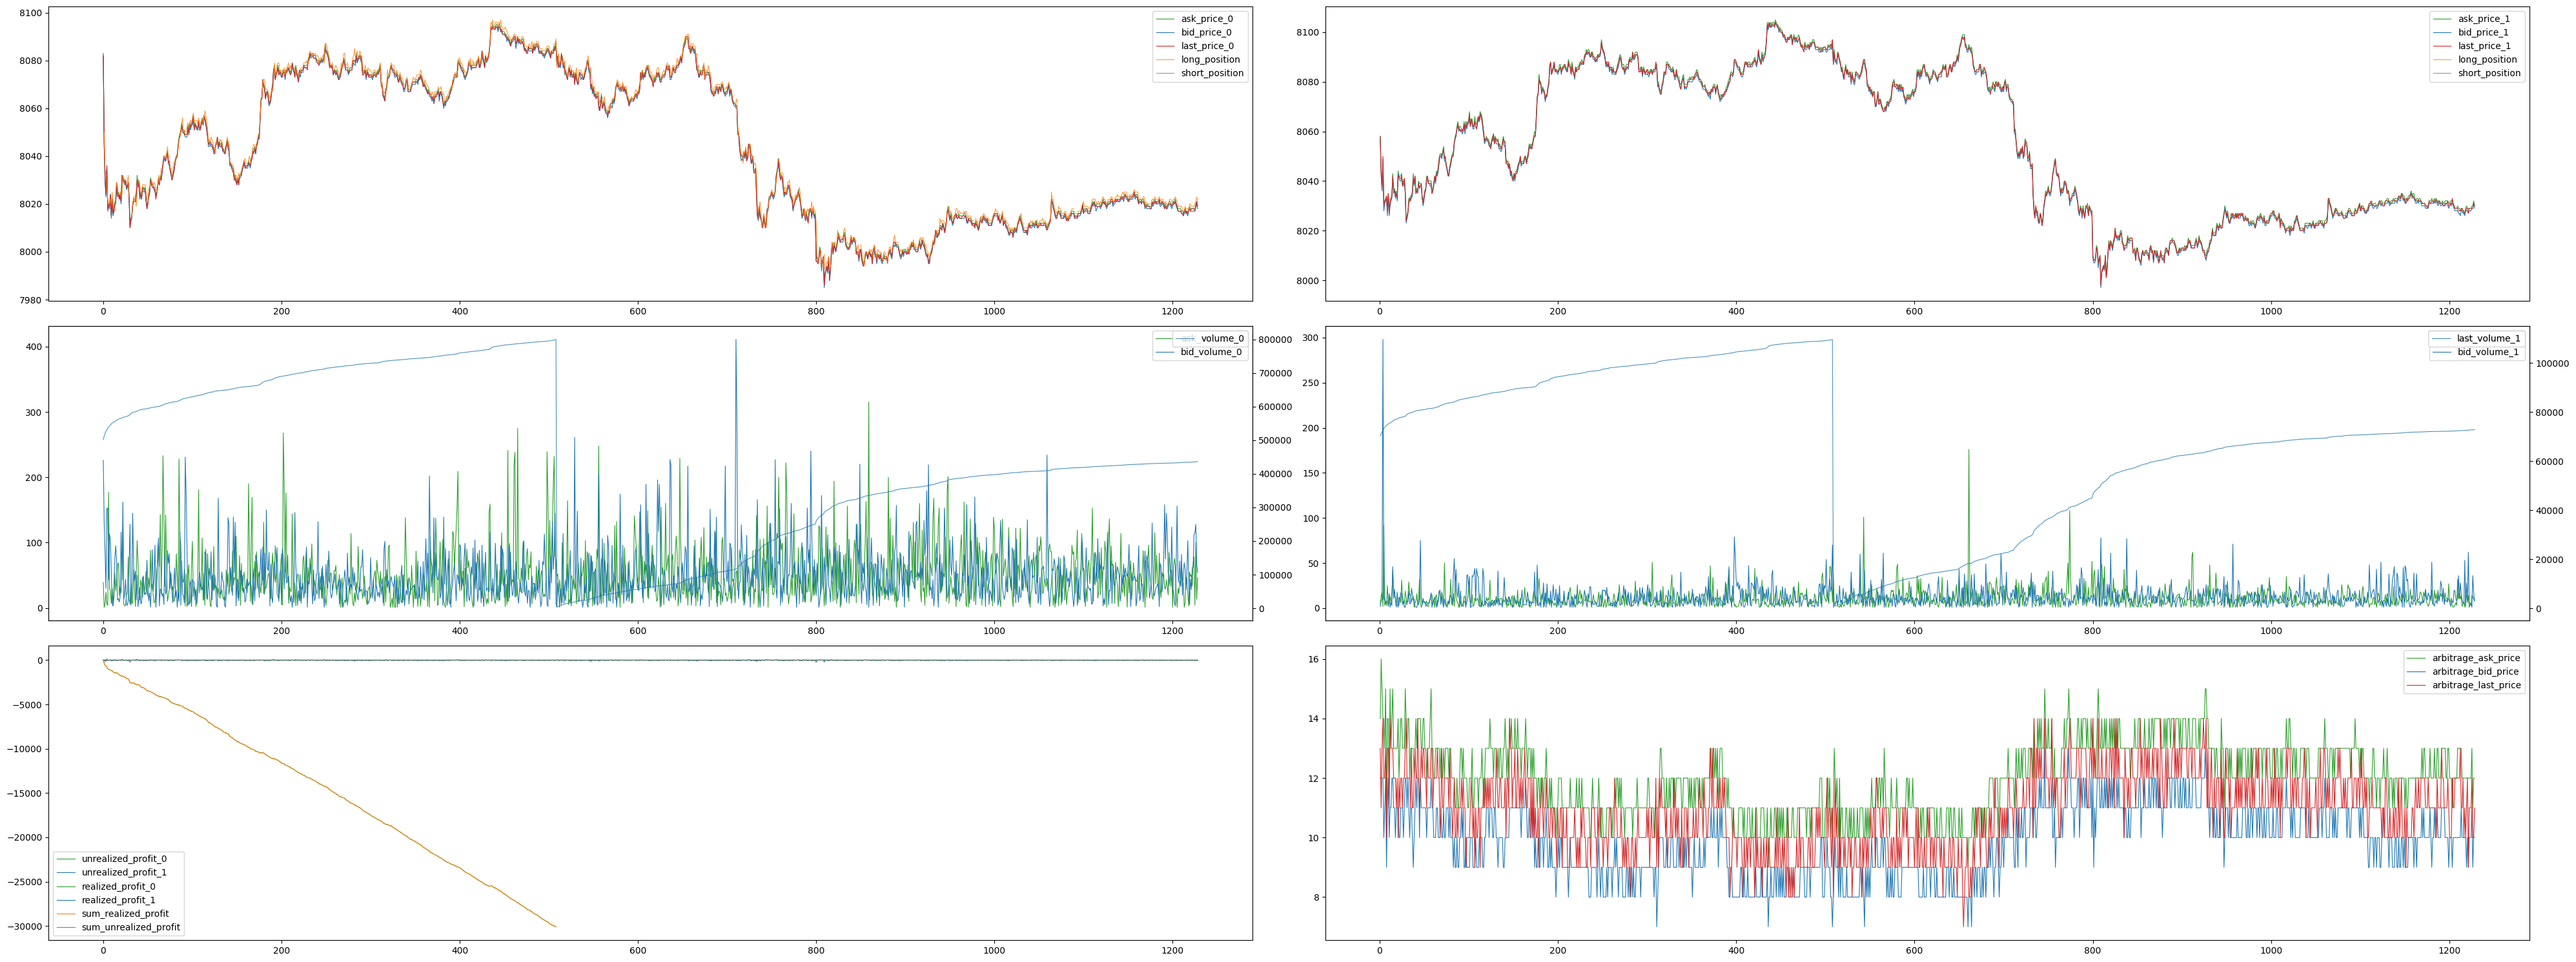

In [2]:
tick_config = (slots, (begin_dt, end_dt))
strategy_native = "/strategy101/build/strategy_strategy101.so"
simulator = sim.Simulator(strategy_native, tick_config, data_center)
simulator.set_arguments("enable_order_test", "1")
result = simulator.simulate()
result.show_metric({"size": (40, 15), "dpi": 100})

Test remote strategy on http://127.0.0.1:6060/. And you should setup remote strategy.
- 1.Create a new terminal by `Fiel`/`New`/`Terminal`
- 2.Run following shell command
```python
# cd /strategy101
# python3 strategy.py
```

|████████████████████████████████████████| 2/2 [100%] in 0.4s (5.60/s) 
|████████████████████████████████████████| 2000/2000 [100%] in 3.4s (593.36/s) 
|████████████████████████████████████████| 20/20 [100%] in 0.0s (93037.56/s) 


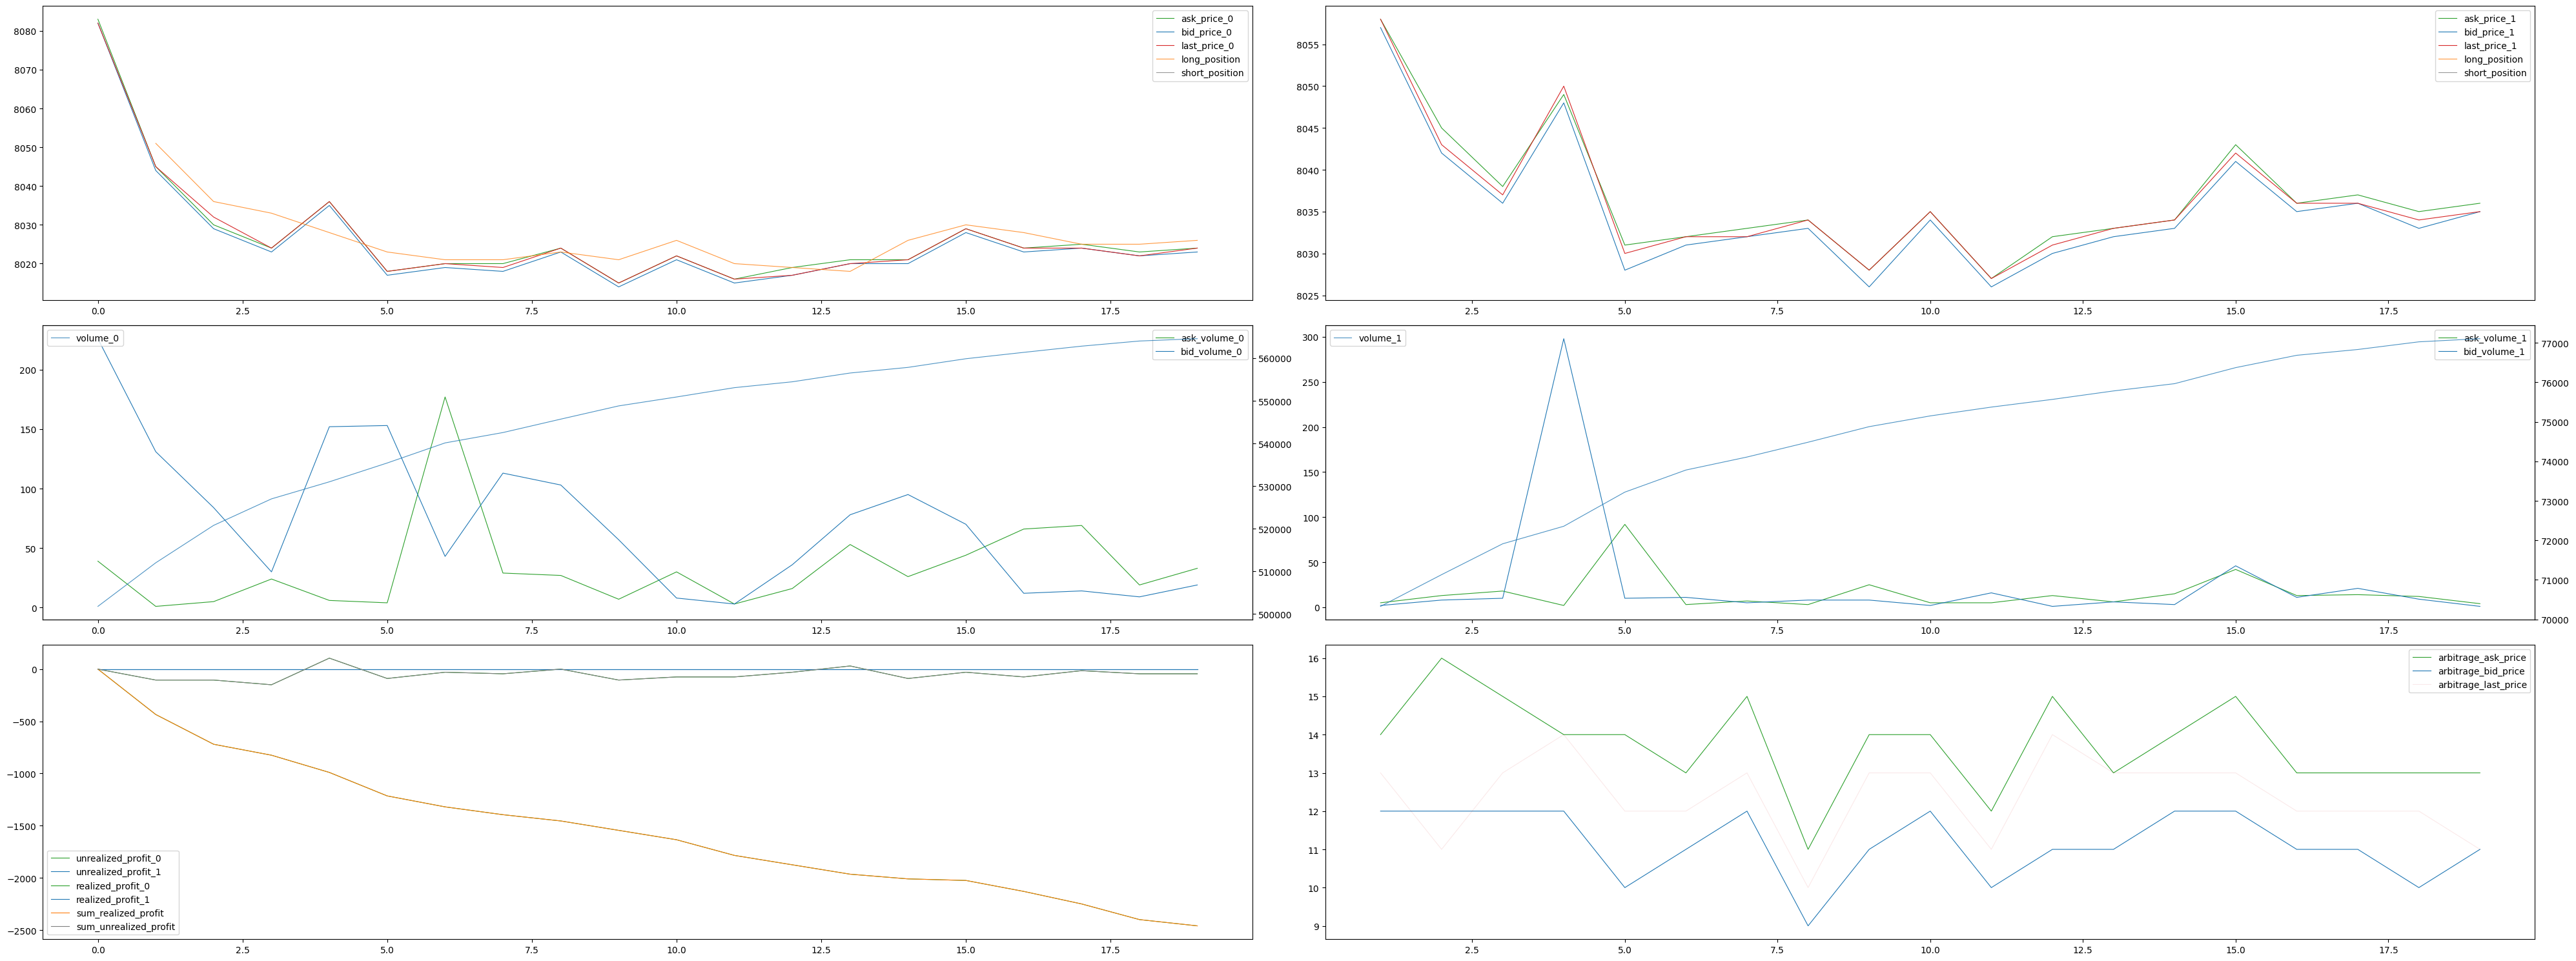

In [5]:
import pythunder.tickutils as ptu
ticks = ptu.load_from_data_center(slots, begin_dt, end_dt, data_center)
ticks = ticks[0:2000]
strategy_remote = ("127.0.0.1", "6060", "/")
simulator = sim.Simulator(strategy_remote, ticks)
simulator.set_arguments("enable_order_test", "1")
result = simulator.simulate()
result.show_metric({"size": (40, 15), "dpi": 100})